In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

In [40]:
X=load_breast_cancer()["data"]
Y=load_breast_cancer()["target"]

In [41]:
print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(569, 30) (569,)


In [42]:
class LogisticRegression_Scratch():
    def __init__(self):
        self.coeff=None
        
    def sigmoid_function(self,X,theta):
        z= X.dot(theta)
        h_x= 1/ (1+ np.exp(-z))
        return h_x
    
    def plot_loss(self, loss):
        plt.title("Loss Function with respect to iterations")
        plt.xlabel("#Iterations")
        plt.ylabel("Loss Function")
        plt.plot(loss)
        return 
    
    def gradient_descent(self, X,y,theta,lr,iterations):
        m=len(y)
        loss_total=[]
        for i in range(iterations):
            h_x=self.sigmoid_function(X,theta)
            l1= np.multiply(y,np.log(h_x))
            l2= np.multiply((1-y),np.log(1-h_x))
            loss= -1*np.sum(l1+l2)/m
            loss_total.append(loss)
            theta= theta - (lr/m)*(X.T.dot(h_x-y))
        
        self.plot_loss(loss_total)
        return theta   

    def fit(self,X,y,lr,iterations):
        theta=np.zeros([X.shape[1],1])
        self.coeff=self.gradient_descent(X,y,theta, lr,iterations)       
        
    def predict(self,X):
        y_prob= self.sigmoid_function(X,self.coeff)
        y_pred= [1 if y >0.5 else 0 for y in y_prob]
        return y_pred     

In [43]:
def data_scaling(X_scaled,y):
    X_array=np.array(X_scaled)
    Y_array=np.array(y)
    print(f"Dimensions of X array: f{X_array.shape}")
    print(f"Dimensions of Y array {Y_array.shape}")
    Y_array=Y_array.reshape(-1,1)
    print(f"Dimensiona of Y array after flatten : f{Y_array.shape}")
    return X_array,Y_array
    
def add_intercept(X_array):    
    m=len(X_array)
    print(f"Dimensions of X array before addition of intercept: f{X_array.shape}")
    X_array= np.append(np.ones([m,1]),X_array, axis=1)
    print(f"Dimensions of X array after addition of intercept {X_array.shape}")
    return X_array

In [44]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size=0.30, random_state=42)

Dimensions of X array: f(398, 30)
Dimensions of Y array (398,)
Dimensiona of Y array after flatten : f(398, 1)
Dimensions of X array before addition of intercept: f(398, 30)
Dimensions of X array after addition of intercept (398, 31)


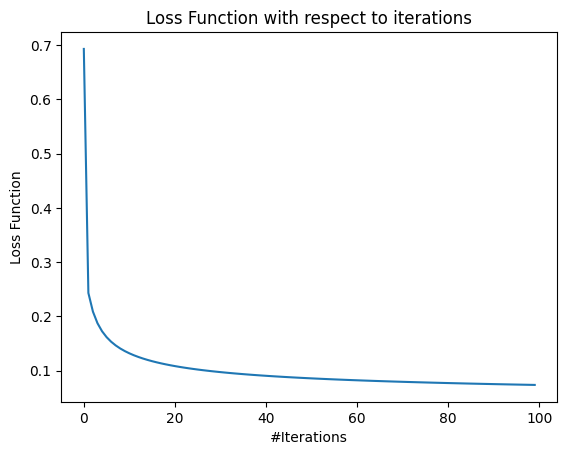

In [45]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X_train)

X_array,Y_array= data_scaling(X_scaled,Y_train)
X_array = add_intercept(X_array)

lgr_scratch=LogisticRegression_Scratch()
lgr_scratch.fit(X_array,Y_array,0.5,100)

In [46]:
X_scaled_test=scaler.fit_transform(X_test)
X_array_test,Y_array_test= data_scaling(X_scaled_test,Y_test)
X_array_test = add_intercept(X_array_test)
print(f"Based on Testing Data : \n {confusion_matrix(Y_array_test,lgr_scratch.predict(X_array_test))}") 
print(f"Based on Training Data : \n  {confusion_matrix(Y_array,lgr_scratch.predict(X_array))}") 


Dimensions of X array: f(171, 30)
Dimensions of Y array (171,)
Dimensiona of Y array after flatten : f(171, 1)
Dimensions of X array before addition of intercept: f(171, 30)
Dimensions of X array after addition of intercept (171, 31)
Based on Testing Data : 
 [[ 61   2]
 [  0 108]]
Based on Training Data : 
  [[145   4]
 [  2 247]]
